<a href="https://colab.research.google.com/github/vcbanalyst/Prediction-of-Product-Sales/blob/main/Bopp_Sales_Prediction_of_Food_Items_Sold_at_Various_Stores_Explanatory_Discovery_Analysis_Charts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Title: Sales Prediction of Food Items Sold at Various Stores

####Author: Vanessa Bopp

##Project Overview

This will be a sales prediction for food items sold at various stores. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

# Data Dictioary

|Variable Name	|Description|
|---------------|:----------|
|Item_Identifier	|Unique product ID|
|Item_Weight	|Weight of product|
|Item_Fat_Content	|Whether the product is low fat or regular|
|Item_Visibility	|The percentage of total display area of all products in a store allocated to the particular product|
|Item_Type	|The category to which the product belongs|
|Item_MRP	|Maximum Retail Price (list price) of the product|
|Outlet_Identifier	|Unique store ID|
|Outlet_Establishment_Year	|The year in which store was established|
|Outlet_Size	|The size of the store in terms of ground area covered|
|Outlet_Location_Type	|The type of area in which the store is located|
|Outlet_Type	|Whether the outlet is a grocery store or some sort of supermarket|
|Item_Outlet_Sales	|Sales of the product in the particular store. This is the target variable to be predicted.|

# Import required packages

In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
from matplotlib import pyplot as plt, font_manager as fm

##Load and Inspect Data

In [130]:
# Save the filepath and load the data as "df"
fpath = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'

In [131]:
df = pd.read_csv(fpath)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [133]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


##Clean Data

Let's explore the data - what do we need to do to clean this data?






1) How many rows and columns?

There are 8523 rows and 12 columns as we can see in the .info() of our dataframe.

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB



2) What are the datatypes of each variable?


Our dataframe contains the following datatypes for each variable: objects, float64, and int64.

In [135]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


3) Are there duplicates? If so, drop any duplicates.


Answer: There are no duplicated rows as we can see below.

In [136]:
duplicated_rows = df.duplicated()
duplicated_rows

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [137]:
df.duplicated().sum()

0


4) Identify missing values.


We have missing values in the Item_Weight and Outlet_Size columns, shown below by volume and percentage. 

Next, we visualize the columns with missing values as shown in the missingno matrix plot, identified by the black and white columns.

The cells below shows our missing values by volume in the Item_Weight and Outlet_Size columns. Item_Weight is missing 1463 values; Outlet_Size is missing 2410 values.

Values by volume:

In [138]:
print(df.isna().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


Now let us look at what percentage of missing values we have in the Item_Weight and Outlet_Size columns. The cell below shows that Item_Weight is missing nearly 17% of its values; Outlet_Size is missing nearly 28% of its values.

In [139]:
# calculate the percentage of null values for each column.
print(df.isna().sum()/len(df)*100)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


Now we can visualize the missing values by using the missingno package's matrix plot. For columns that show missing values, we will see black and white lines where white space indicates missing values; for columns that have no null values, the column will appear solid black. Sometimes patterns emerge across rows of missing data, but in our plot below, there appears to be no similarity between the two column patterns.

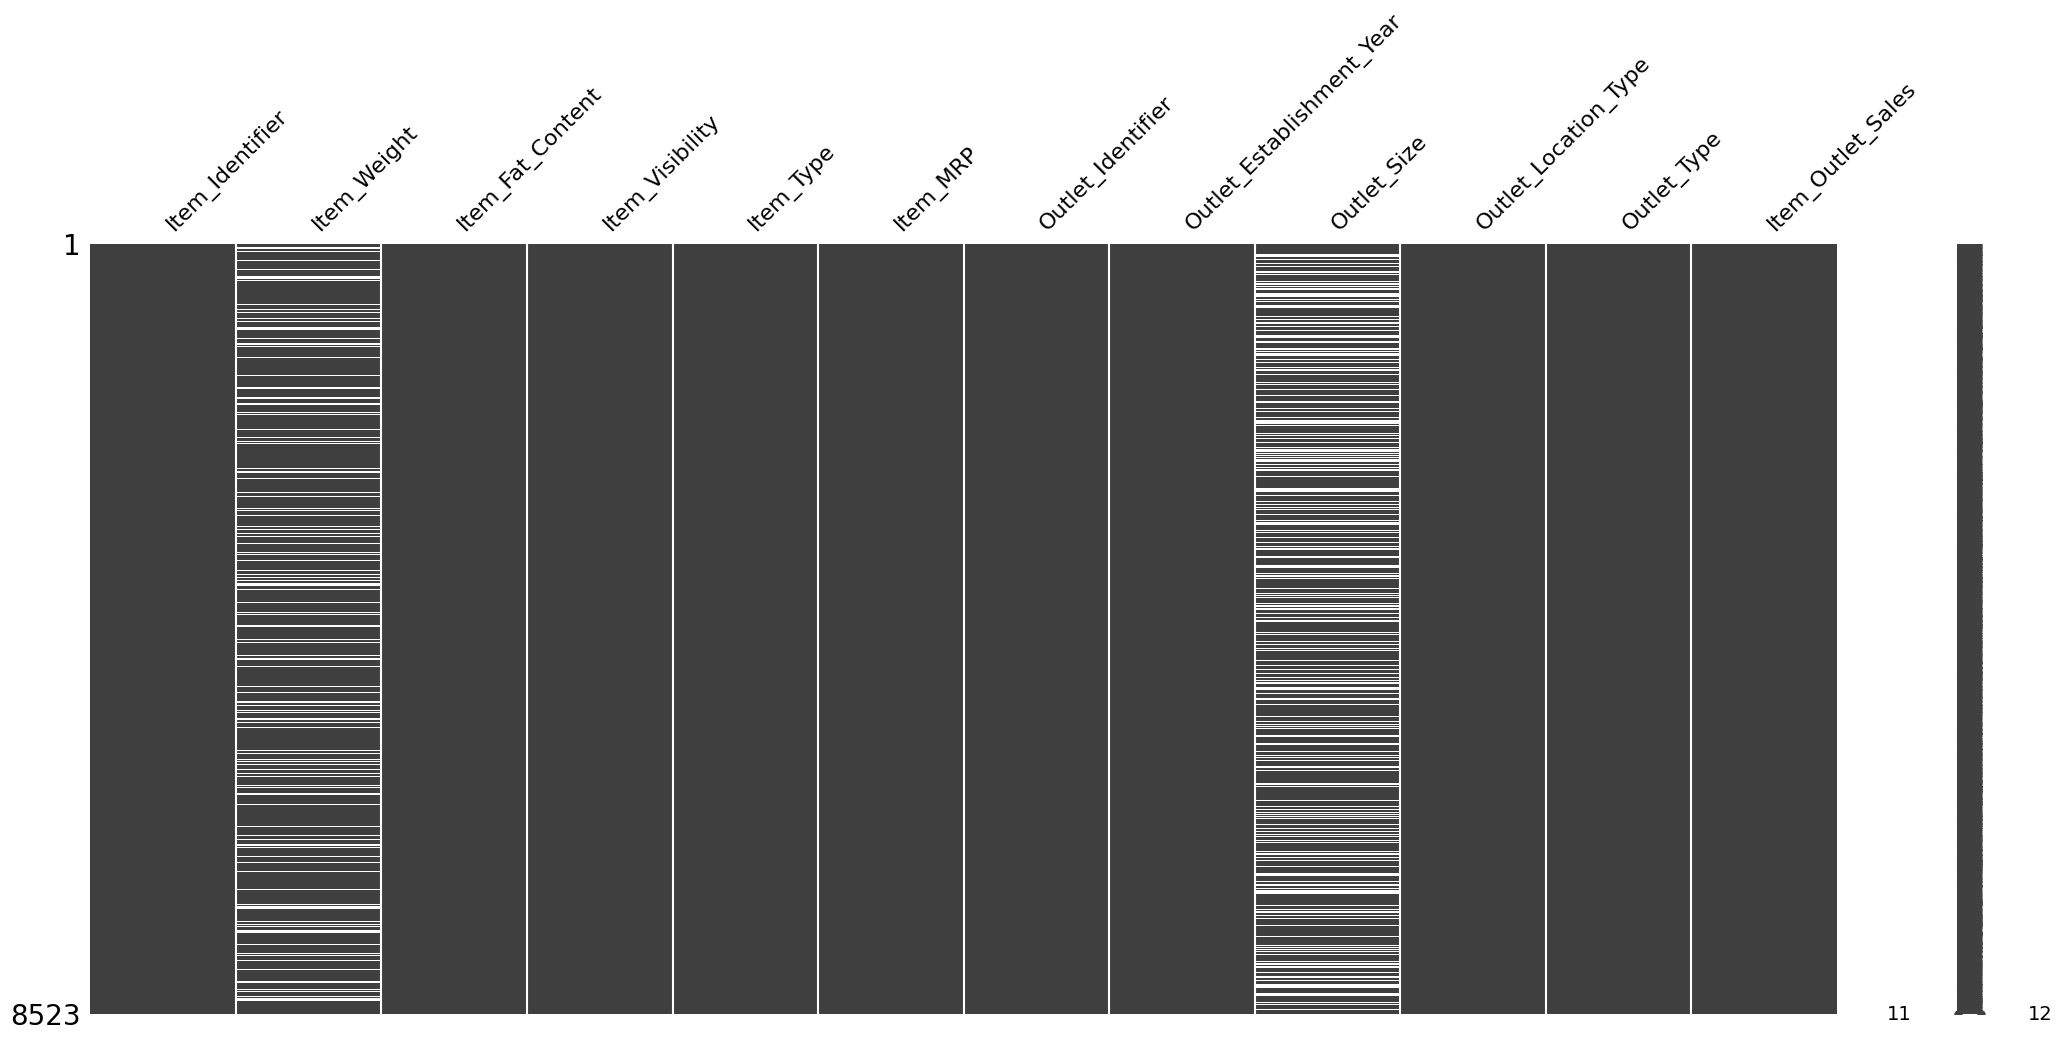

In [140]:
# Visualize the missing values using the missingno package's matrix plot.

import missingno as msno
msno.matrix(df);


5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).


We know the columns missing values are the 'Item_Weight' and 'Outlet_Size'. Let's check their data types and examine the columns to identify what values are missing, and how to correct for it.

Here we can see that Item_Weight is a float64 data type and Outlet_Size is an object data type. This is relevant in how we query for categorical or numerical values in the next steps to examine the column values.

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**Item_Weight:**

Let us examine the Item_Weight data first, and decide if we should replace, substitute, or correct values. 

For the missing values in the Item_Weight column, we already know that it contains nearly 17% of missing float64 values. The missing Item_Weight values will be replaced with the median value of the column, as the median is less affected by outliers than the mean.

In [142]:
item_weight_med = df['Item_Weight'].median()

In [143]:
item_weight_med

12.6

The median value we will use to replace in the missing values will be 12.6. We will check our .info for Null values in all columns when we are finished preparing the data in the next column, which is Outlet_Size.

In [144]:
df['Item_Weight'].fillna(value = item_weight_med, inplace=True)

**Outlet_Size:**

For the missing values in the Outlet_Size column, it has 28% of object values missing. What are the possible values that are present in the column? Let's take a look.

In [145]:
df["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

We can see above that our column contains the following values: 
- Medium
- nan (which are our null values)
- High
- Small

We will fill in the missing values by using 'Unknown' since we cannot assume a size.

We also notice that when we check the value counts, we have 932 outlets as a 'High' size, but it does not match our other size values of Small and Medium, so we will change this to Large in the next phase of data cleaning, which is fixing inconsistent categories of data.

In [146]:
df["Outlet_Size"].value_counts()


Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Let's replace our 2410 null values with 'Unknown'.

In [147]:
df['Outlet_Size'].fillna(value = 'Unknown', inplace=True)


6) Confirm that there are no missing values after addressing them.


In [148]:
print(f'There are {df.isna().sum().sum()} missing values.')

There are 0 missing values.



7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).



Let's look at the values of the columns now to identify if there are any other inconsistencies that may need corrections. We already know that 'Outlet_Size' needs attention, but what else is there?

First we'll collect the data types by categorical columns, with the object data types.

In [149]:
data_types = df.dtypes
str_cols = data_types[ data_types=='object'].index
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

The following cell takes the categorical columns with object data types and shows us each column header name followed by the values present in the column and the associated sum for each value.

In [150]:
for col in str_cols:
    print(f'- {col}:')
    print(df[col].value_counts(dropna=False))
    print("\n\n")

- Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



- Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



- Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64



- Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    9

Examining these categoical columns with object types, we can see the following columns have some inconsistencies.

'Item_Identifier' has a lot of unique values. How many unique values are there?

'Item_Fat_Content' needs some consolidation for:
- 'Low Fat', 'LF', 'low fat' should all be 'Low Fat'
- 'Regular', 'reg' should all be 'Regular'

'Outlet_Size' has 'High' and it should be changed to 'Large'.

Let's finish up 'Outlet_Size', and change all of the 'High' values to 'Large'.

In [151]:
df['Outlet_Size'] = df['Outlet_Size'].replace({'High':'Large'})

Now let's check our value counts again for 'Outlet_Size' to make sure our changes are reflected.

In [152]:
df["Outlet_Size"].value_counts()

Medium     2793
Unknown    2410
Small      2388
Large       932
Name: Outlet_Size, dtype: int64

Great! Now we see our 'Unknown' values from our previous work, as well as our change from 'High' to 'Large'.

Let's move on to 'Item_Fat_Content' changes:
- 'Low Fat', 'LF', 'low fat' should all be 'Low Fat'
- 'Regular', 'reg' should all be 'Regular'


In [153]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'})

Let us check our value counts on 'Item_Fat_Content' to ensure our changes were made.

In [154]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Great! Our last task with the object types is to invesigate the unique values of 'Item_Identifier' to see if we can do anything with it, since so many unique values exist.
 

In [155]:
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [156]:
df['Item_Identifier'].nunique()

1559

Inspecting the column using the .nunique we can see there are 1559 unique values in the 'Item_Identifier' column. We will leave this column as is, and assume that these values have a meaning for this encoding of three letters followed by two numbers as a unique product ID in the data dictionary.

Let's display our object columns again to verify all of them look as we expect.

In [157]:
data_types = df.dtypes
str_cols = data_types[ data_types=='object'].index
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [158]:
for col in str_cols:
    print(f'- {col}:')
    print(df[col].value_counts(dropna=False))
    print("\n\n")

- Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



- Item_Fat_Content:
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64



- Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64



- Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Iden

Moving on to the numerical columns.

8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

Let's check numerical columns next. We have two data types : 'int64' and 'float64'. Let's look at 'int64' first. 

We'll make the categorical column, check the value counts, and unique values.

In [159]:
data_types = df.dtypes
int_cols = data_types[ data_types=='int64'].index
int_cols

Index(['Outlet_Establishment_Year'], dtype='object')

In [160]:
for col in int_cols:
    print(f'- {col}:')
    print(df[col].value_counts(dropna=False))
    print("\n\n")

- Outlet_Establishment_Year:
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64





In [161]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [162]:
df['Outlet_Establishment_Year'].nunique()

9

'Outlet_Establishment_Year' column looks good after checking the value counts and nunique values.

Let's check the categorical columns of the 'float64' data types next, which includes: 

- 'Item_Weight'
- 'Item_Visibility'
- 'Item_MRP', and 
- 'Item_Outlet_Sales


In [163]:
data_types = df.dtypes
float_cols = data_types[ data_types=='float64'].index
float_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')

In [164]:
for col in float_cols:
    print(f'- {col}:')
    print(df[col].value_counts(dropna=False))
    print("\n\n")

- Item_Weight:
12.600    1516
12.150      86
17.600      82
13.650      77
11.800      76
          ... 
7.275        2
7.685        1
9.420        1
6.520        1
5.400        1
Name: Item_Weight, Length: 415, dtype: int64



- Item_Visibility:
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64



- Item_MRP:
172.0422    7
170.5422    6
196.5084    6
188.1872    6
142.0154    6
           ..
97.3384     1
83.1934     1
96.6752     1
152.6682    1
75.4670     1
Name: Item_MRP, Length: 5938, dtype: int64



- Item_Outlet_Sales:
958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1278.3360    14
             ..
4124.6310     1
6622.7126     1
1614.5650     1
5602.7070     1
2778.3834     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64





Looking through these 'float64' columns, nothing looks inconsistent. Let's investigate a little further to check that our .nunique values seem reasonable, as well as the statistics for the float columns.

Let's check the nunique values for each column.

In [165]:
df['Item_Weight'].nunique()

415

In [166]:
df['Item_Visibility'].nunique()

7880

In [167]:
df['Item_MRP'].nunique()

5938

In [168]:
df['Item_Outlet_Sales'].nunique()

3493

Let's also look at the statistics of our float columns by using .describe , and then we can decide if our numerical columns are normalized, check out the min, max, and mean. The .describe will also give us some additional statistics that may be useful in one spot, like the count of all of the values for each column, the std (standard deviation), and the 25%, 50%, and 75% percentile values.

In [169]:
df.describe(include="float")

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,2181.288914
std,4.22724,0.051598,62.275067,1706.499616
min,4.55500,0.000000,31.290000,33.290000
25%,9.31000,0.026989,93.826500,834.247400
50%,12.60000,0.053931,143.012800,1794.331000
75%,16.00000,0.094585,185.643700,3101.296400
max,21.35000,0.328391,266.888400,13086.964800


We notice the following: 


- 'Item_Weight' has a range of 4 to 21. We don't know the measurement value here to judge if it is a normal range or not, along with 415 unique values in the column, thus it would be difficult to clean the data. We will leave this column alone.


- 'Item_Visibility' looks to be a ratio of some kind since all the values are less than 1 with 7880 unique values in the column. Referring to our Data Dictionary, this is a percentage of total display area of all products in a store allocated to the particular product. Without more information on the measurement used for area, it will be difficult to clean the data. We will leave this column alone.


- 'Item_MRP' or the Maximum Retail Price (list price) of the product, ranges from 31 to 266, with 5938 unique values for the column, but we do not know if this range is acceptable due to not knowing what currency was used. We will leave this column alone.


- 'Item_Outlet_Sales' is the sales of the product in the particular store and is the target variable to be predicted. It could be in any currency, thus we do not know if a range from 33 to 13086, with 3493 unique values is normal. We will leave this column alone.

##Exploratory Data Analysis

Histograms:

Let's take a look using the histogram to view the distribution of Item Weight.

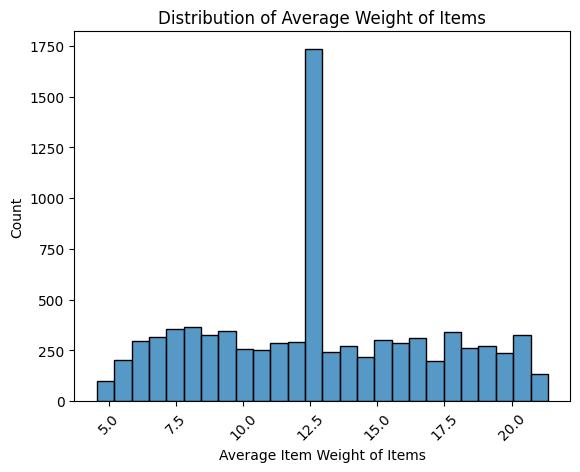

In [170]:
ax = sns.histplot(data=df, x='Item_Weight')
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);

ax.set_title('Distribution of Average Weight of Items')
ax.set_xlabel('Average Item Weight of Items')
ax.set_ylabel('Count');

We can see our histogram above shows a mostly ragged plateau distribution, with an outlier in the middle of a high count of items on average weighing 12.5 in our dataset.

Let's see what happens when we compare the average of Item Weight to Item Outlet Sales in a histogram.

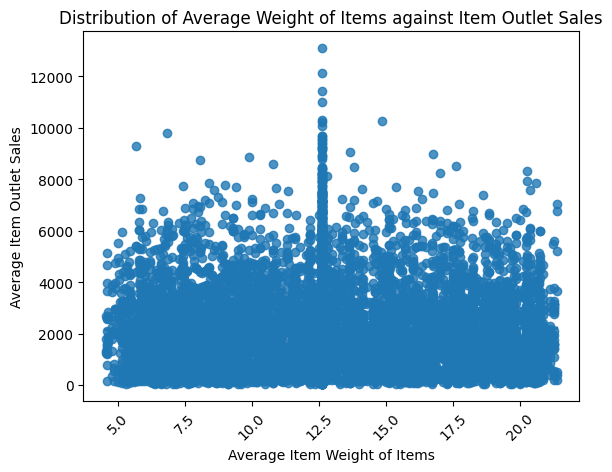

In [171]:

ax = sns.regplot(data=df, x='Item_Weight', y='Item_Outlet_Sales')
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);

ax.set_title('Distribution of Average Weight of Items against Item Outlet Sales')
ax.set_xlabel('Average Item Weight of Items')
ax.set_ylabel('Average Item Outlet Sales');

We can see that most of the average Item Weight generate around 6000 in Item Outlet Sales. There are some spotty areas higher up in the chart that are outliers. We see again the Items weighing around 12.5 as generating the highest level of Item Outlet sales around 10,000.

Boxplot:

Let's see what the Item Weight data looks like as a boxplot below.

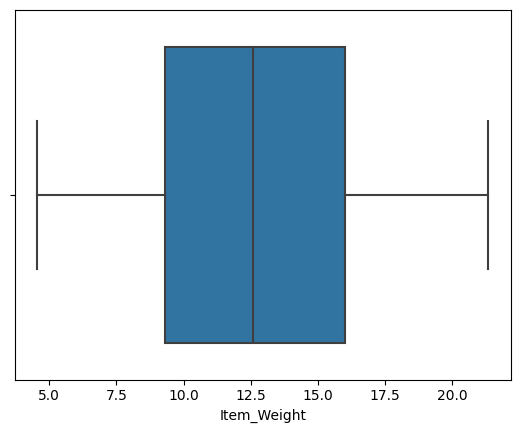

In [172]:
ax = sns.boxplot(data=df, x='Item_Weight');

In [173]:
#no outliers! no dots above whiskers; this is just a lot of median value

We can see that the interquartile range is from 9-16, with a median of 12.5. But, interestingly, we don't see the outlier in the boxplot the same way we saw the spike of the item weight of 12.5 in the histograms above.

Heatmap:

Let's take a look at all of our columns on a Heatmap next to identify which numerical columns contain strong correlations. First we need to calculate the correlations, and then we can use the values to create a chart.

In [174]:
corr = df.corr(numeric_only = True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.01,0.02,0.01,0.01
Item_Visibility,-0.01,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,0.01,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,0.01,-0.13,0.57,-0.05,1.00


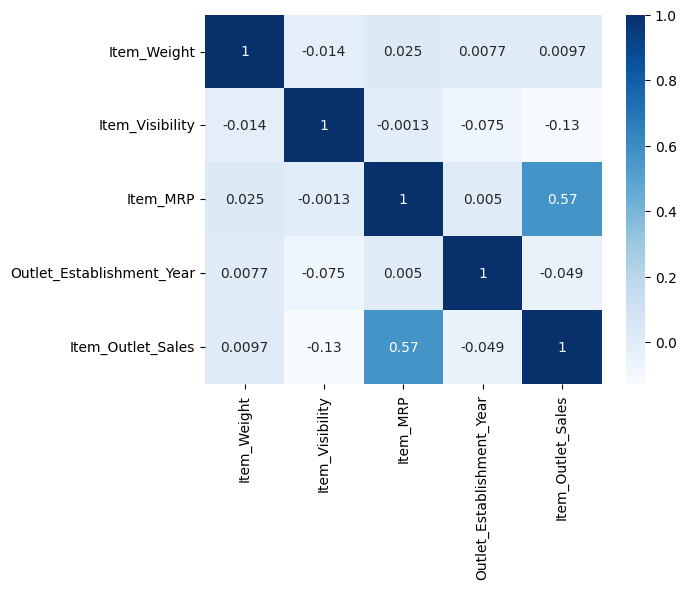

In [175]:
sns.heatmap(corr, cmap = 'Blues', annot = True);

We can see that Item_MRP and Item_Outlet_Sales are moderately correlated with a darker blue color on our chart. We also can see the two variates are correlated moderately by the annotated value of .57 and the only strong correlations occur when the variate is correlated to itself with a correlation value of 1.


##Explanatory Data Analysis

Possible Questions to ask to try to predict Food Items Sold at various stores:

1. What are the Average Sales by Outlet Type?
2. What are the Average Sales by Outlet_Size?



1. What are the average sales of items by outlet type ?

In [176]:
avg_outlet_type_sales = df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
avg_outlet_type_sales

Outlet_Type
Supermarket Type3    3694.038558
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Grocery Store         339.828500
Name: Item_Outlet_Sales, dtype: float64

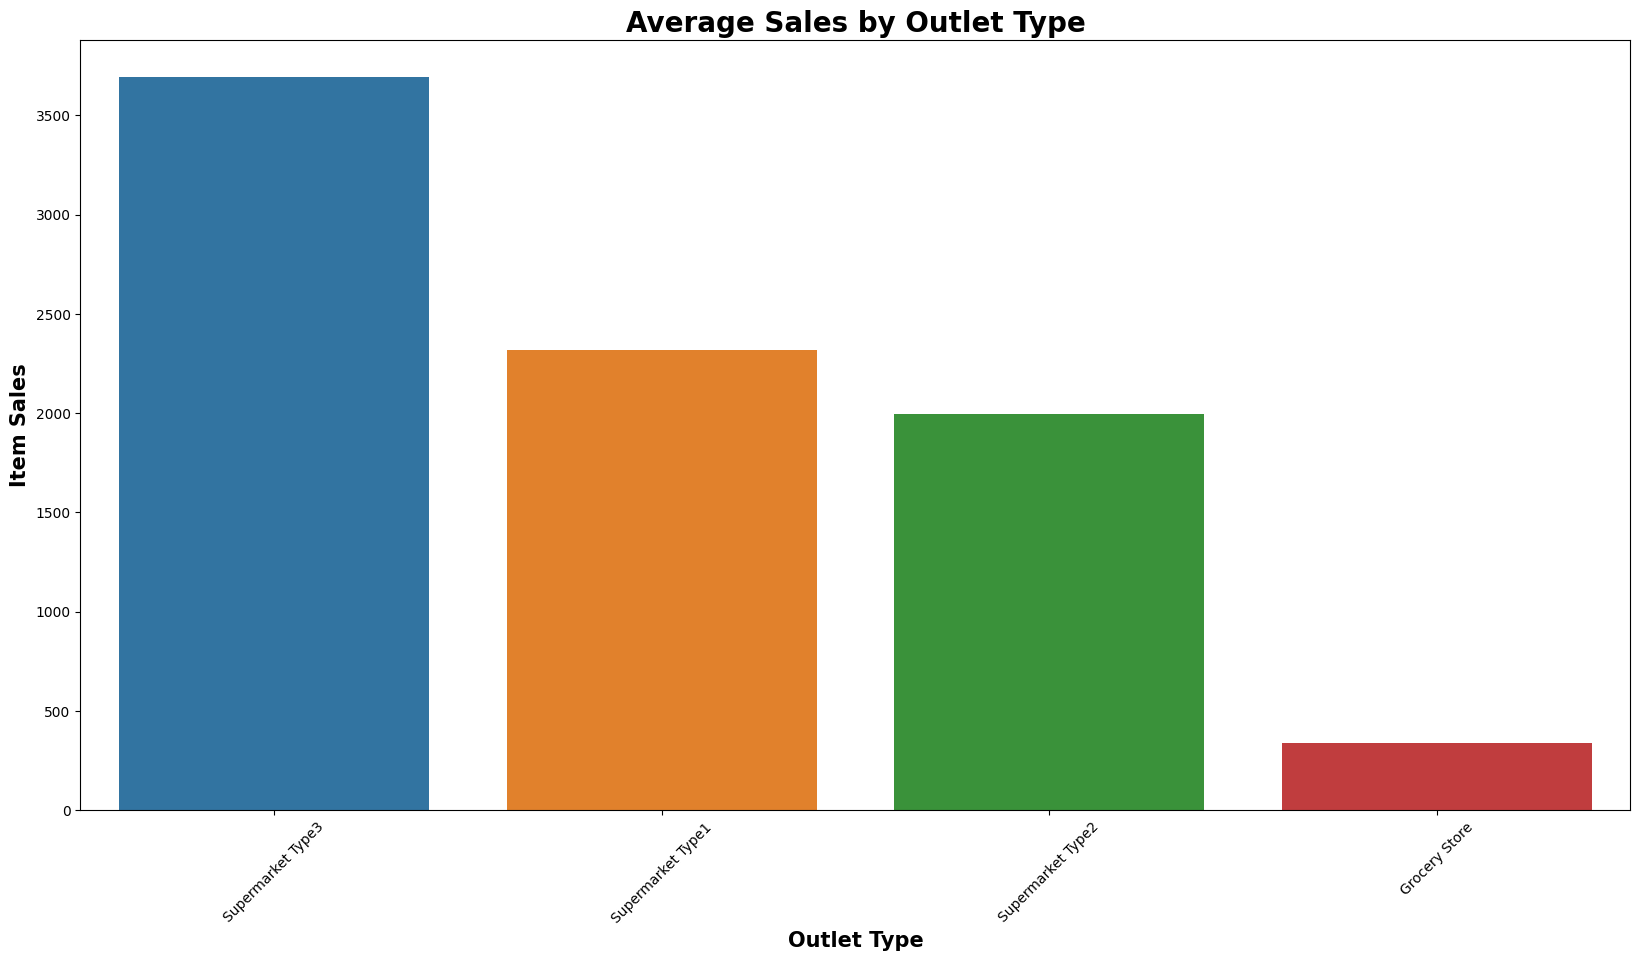

In [177]:
#make a bar graph
fig, ax = plt.subplots(figsize=(20, 10))

ax = sns.barplot(data=df, x='Outlet_Type', y='Item_Outlet_Sales', order = avg_outlet_type_sales.index, errorbar = None)
plt.xticks(rotation=45)
ax.set_title('Average Sales by Outlet Type', size=20, fontweight='bold')
ax.set_xlabel('Outlet Type', size=15, fontweight='bold')
ax.set_ylabel('Item Sales', size=15, fontweight='bold');

We can see that Supermarket Type 3 has the most Item Sales, followed by Supermarket Type 1, Supermarket Type2, and last, Grocery Store.

2. What are the average item sales by outlet size?

In [178]:
#outlet size and item sales

avg_outlet_size_sales = df.groupby('Outlet_Size')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
avg_outlet_size_sales


Outlet_Size
Medium     2681.603542
Large      2298.995256
Small      1912.149161
Unknown    1822.626947
Name: Item_Outlet_Sales, dtype: float64

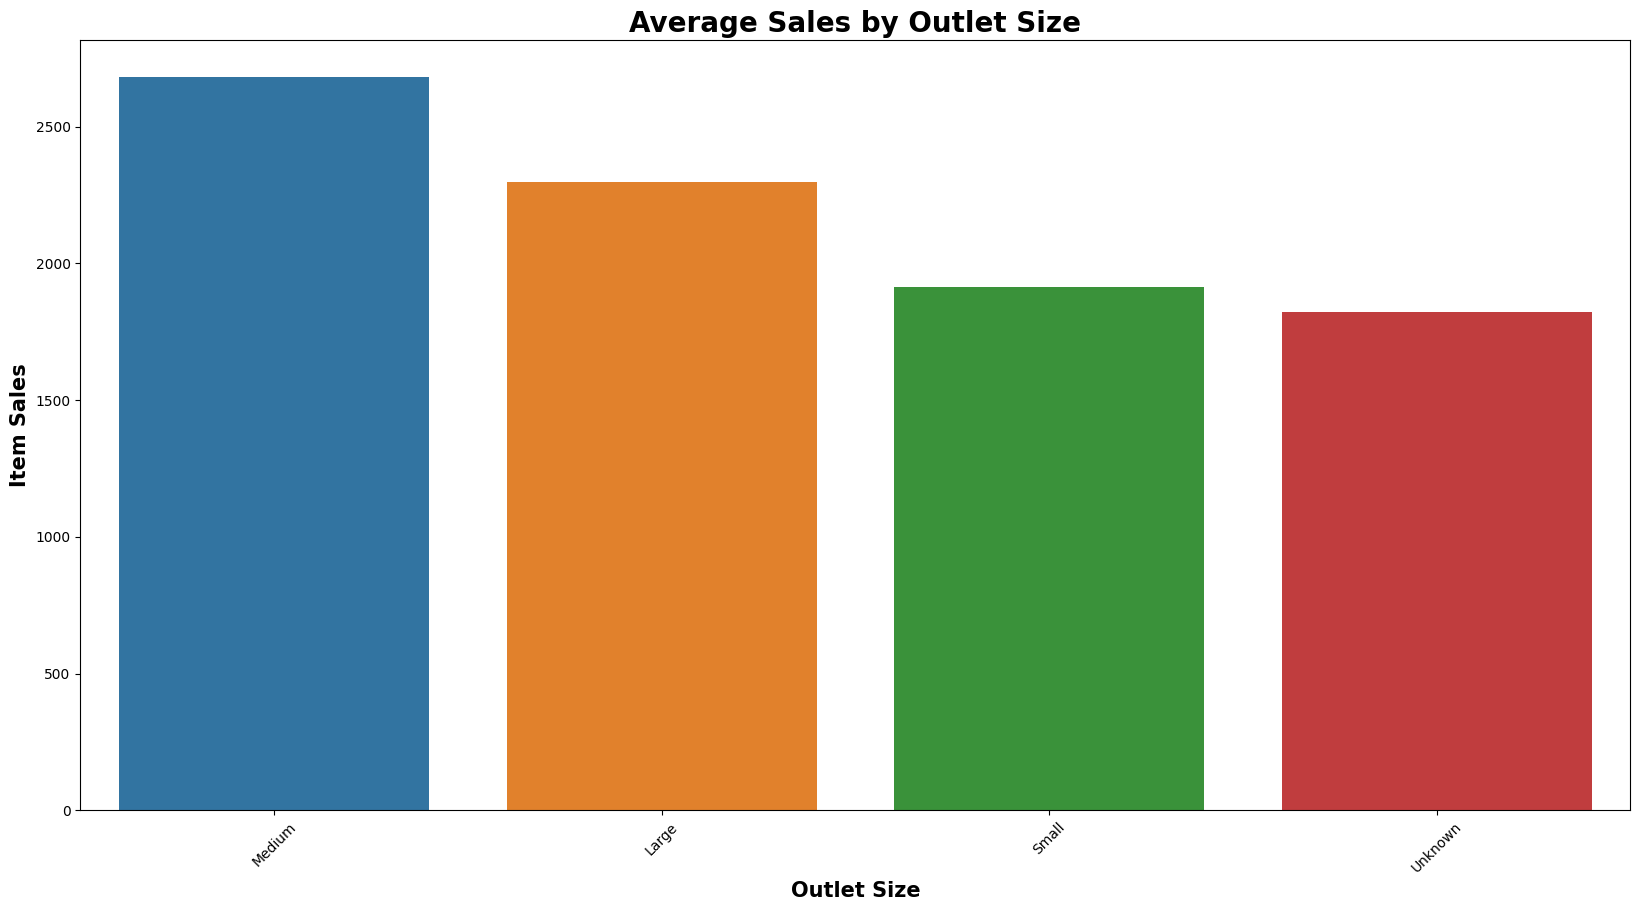

In [179]:
#make a bar graph
fig, ax = plt.subplots(figsize=(20, 10))

ax = sns.barplot(data=df, x='Outlet_Size', y='Item_Outlet_Sales', order = avg_outlet_size_sales.index, errorbar = None)
plt.xticks(rotation=45)
ax.set_title('Average Sales by Outlet Size', size=20, fontweight='bold')
ax.set_xlabel('Outlet Size', size=15, fontweight='bold')
ax.set_ylabel('Item Sales', size=15, fontweight='bold');

In the Average Sales by Outlet Size, we can see that Medium sized Outlets have the highest sales, followed by the Large Outlet Size, Small Outlet Size, and Unknown Outlet Size. 



Let's take a look at Item Type by Item Sales.

In [188]:
#item type and item sales grouped by item type on average

avg_item_sales_by_type = df.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
avg_item_sales_by_type

Item_Type
Starchy Foods            2374.332773
Seafood                  2326.065928
Fruits and Vegetables    2289.009592
Snack Foods              2277.321739
Household                2258.784300
Dairy                    2232.542597
Canned                   2225.194904
Breads                   2204.132226
Meat                     2158.977911
Hard Drinks              2139.221622
Frozen Foods             2132.867744
Breakfast                2111.808651
Health and Hygiene       2010.000265
Soft Drinks              2006.511735
Baking Goods             1952.971207
Others                   1926.139702
Name: Item_Outlet_Sales, dtype: float64

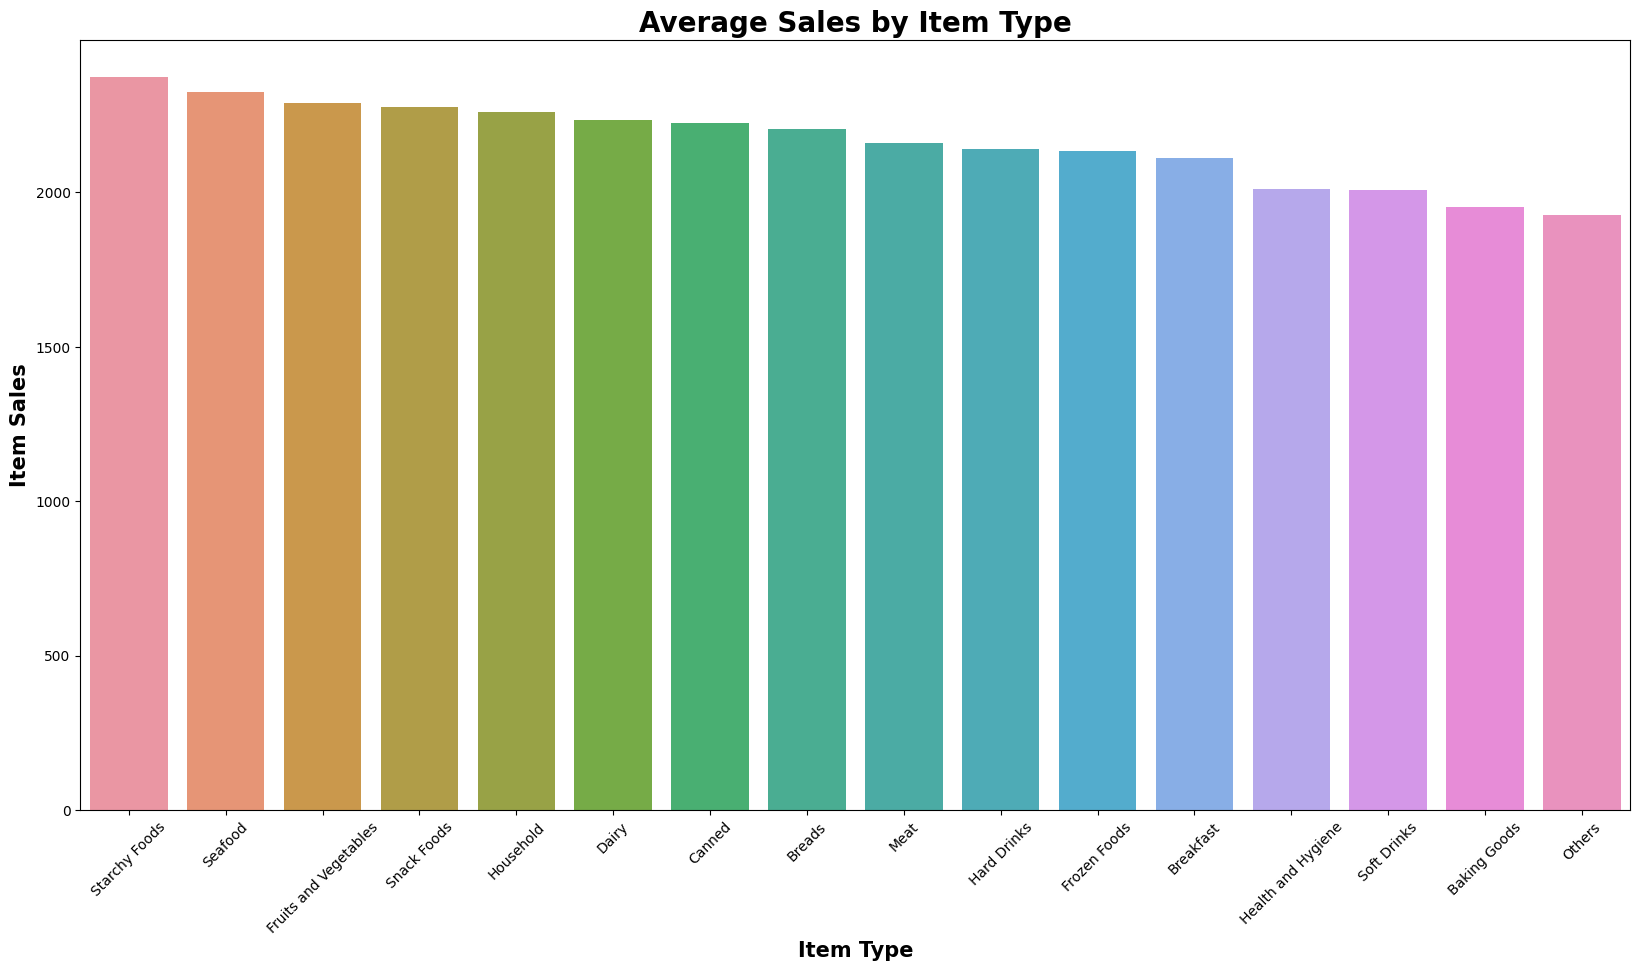

In [190]:
#make a bar graph
fig, ax = plt.subplots(figsize=(20, 10))

ax = sns.barplot(data=df, x='Item_Type', y='Item_Outlet_Sales', order = avg_item_sales_by_type.index, errorbar = None)
plt.xticks(rotation=45)
ax.set_title('Average Sales by Item Type', size=20, fontweight='bold')
ax.set_xlabel('Item Type', size=15, fontweight='bold')
ax.set_ylabel('Item Sales', size=15, fontweight='bold');

# TO DO / Ideas when I have time:

In [ ]:
#can do a function to replace the x with various things to produce these charts:
# item sales by Outlet_Location_Type
# sales by Outlet_Identifier
# sales by Item_Type
# sales by Item_Identifier

#outlet size : Can we ask if Unknown can be categorized better?

#Other Questions to re-word/make charts for:
2. Does Item_Weight have an impact on Item_Outlet_Sales ?
3. Does the Item_Visibility impact Item_Outlet_Sales?
4. Which Outlet_Identifier is impacting item_Outlet_Sales the most/least?

In [ ]:
#Data viz 2: 
#take a look at numerical columns with comparing items side by side for something?

item_weight
item_visibility
item_mrp
item_outlet_sales

In [ ]:
#figure this out and why i can't get it to work

### Creating the Figure and Axes with matplotlib
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (6,8), sharex=True)
# Plotting Subplot 1 with Seaborn
sns.scatterplot(data=df, x='Item_Type', y='Item_Outlet_Sales', order = avg_item_sales_by_type.index, ax=axes[0])
axes[0].set_title('Item Type vs Item Sales', fontsize = 12);
axes[0].set_ylabel("Item Sales")
axes[0].set_xlabel("Item Type")

# Plotting Subplot 2 with Pandas
df['Item_Outlet_Sales'].hist(bins='auto', edgecolor='black',ax=axes[1])
axes[1].set_ylabel('Item Sales', fontsize = 12);

### ylabel is no longer needed for the second subplot.
#axes[1].set_ylabel("Item Sales")
axes[1].set_xlabel("Item Type")

## Fixing overlapping labels
fig.tight_layout()